# Inspect Extracted Ionogram Points

#### Updated: Jul 21, 2023

#  

After processing a set of ionogram images, the extracted dataset includes 'mapped_coord', which is the extracted and isolated ionogram points that are mapped to a Hz-km space. Plot mapped coord and determine if other (or better) information can be gained from the 'mapped_coord' array.

In [19]:
import pandas as pd
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [37]:
rootDir = 'L:/DATA/Alouette_I/'
processedDir = rootDir + 'BATCH_I_Run2/04_processed/'
mapped_coordsDir = 'L:/DATA/Alouette_I/Total/05_result/mapped_coords/'

#  

#### Functions:

In [38]:
def draw_random_image(processedDir):
    
    directory_list = os.listdir(processedDir)
    directory = directory_list[randrange(len(directory_list))]
    subdirectory_list = os.listdir(processedDir + directory + '/')
    subdirectory = subdirectory_list[randrange(len(subdirectory_list))]
    file_list = os.listdir(processedDir + directory + '/' + subdirectory + '/')
    filename = file_list[randrange(len(file_list))]
    filepath = processedDir + directory + '/' + subdirectory + '/' + filename
    return_dict = {
        'Directory': directory,
        'Subdirectory': subdirectory,
        'filename': filename,
        'filepath': filepath
    }
    
    return return_dict

#  

#### Plot 'mapped coord' for each of the processed ionograms:

In [39]:
draw_dict = draw_random_image(processedDir=processedDir)
draw_dict

{'Directory': 'R014207821',
 'Subdirectory': '3363-A38',
 'filename': '225.png',
 'filepath': 'L:/DATA/Alouette_I/BATCH_I_Run2/04_processed/R014207821/3363-A38/225.png'}

In [40]:
arr_name = draw_dict['filename'].replace('.png', '.npy')
arr_name

'225.npy'

In [41]:
arr_load = np.load(mapped_coordsDir + draw_dict['Directory'] + '/' + draw_dict['Subdirectory'] + '/' + 'mapped_coords-' + draw_dict['Directory'] + '_' + draw_dict['Subdirectory'] + '_' + arr_name)
print(arr_load.shape)
arr_load

(35868, 2)


array([[   1.99596774,    2.04081633],
       [   2.        ,    2.04081633],
       [   2.00806452,    2.04081633],
       ...,
       [  10.15591398, 1204.08163265],
       [  10.14516129, 1206.12244898],
       [  10.15053763, 1206.12244898]])

In [42]:
df_plot = pd.DataFrame({
    'f': arr_load[:, 0],
    'depth': arr_load[:, 1]
})
df_plot['depth_plot'] = -1*df_plot['depth']
df_plot.head()

,f,depth,depth_plot
0,1.995968,2.040816,-2.040816
1,2.000000,2.040816,-2.040816
2,2.008065,2.040816,-2.040816
3,2.016129,2.040816,-2.040816
4,2.483871,2.040816,-2.040816


[[], []]

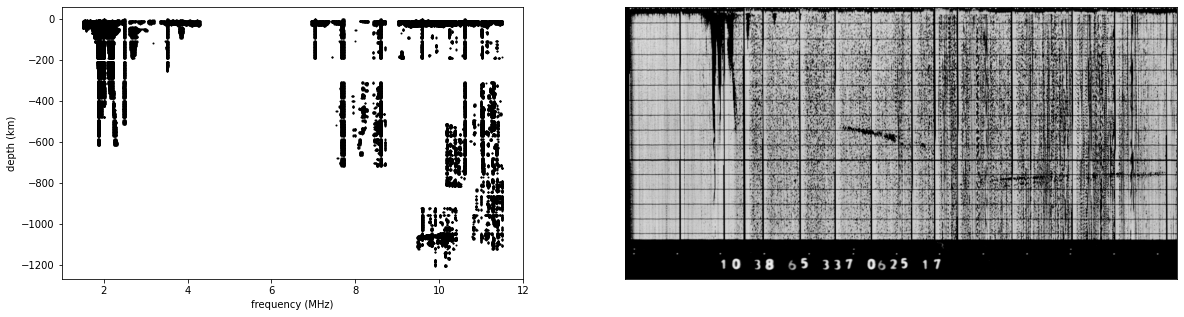

In [43]:
f, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1,1.2],}, figsize=(20,5))

axs[0].scatter(df_plot['f'], df_plot['depth_plot'], 1, color='black')
axs[0].set(xlabel='frequency (MHz)', ylabel='depth (km)')

img = mpimg.imread(draw_dict['filepath'])
axs[1].imshow(img)
axs[1].set(xticks=[], yticks=[])

#  

(71375, 2)


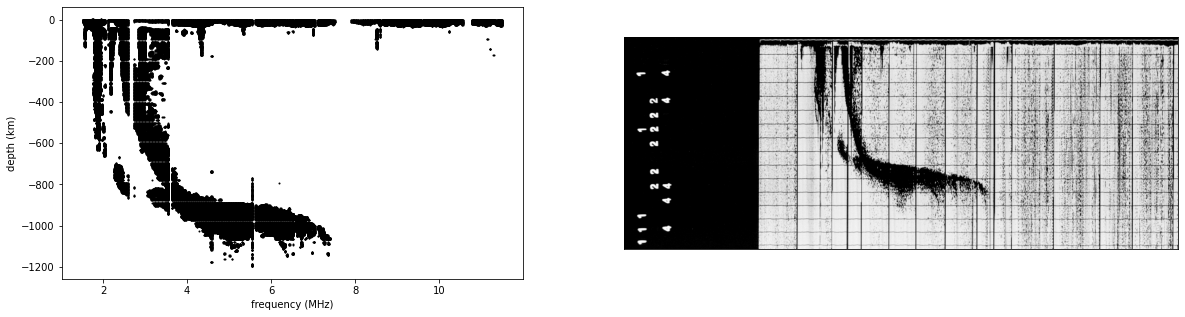

L:/DATA/Alouette_I/BATCH_I_Run2/04_processed/R014207960/2552-5B/107.png


(2859, 2)


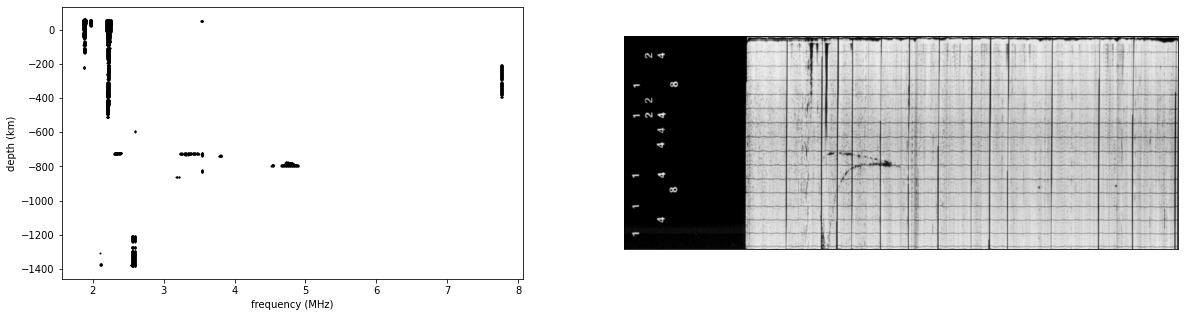

L:/DATA/Alouette_I/BATCH_I_Run2/04_processed/R014207947/1867-6A/233.png


(33768, 2)


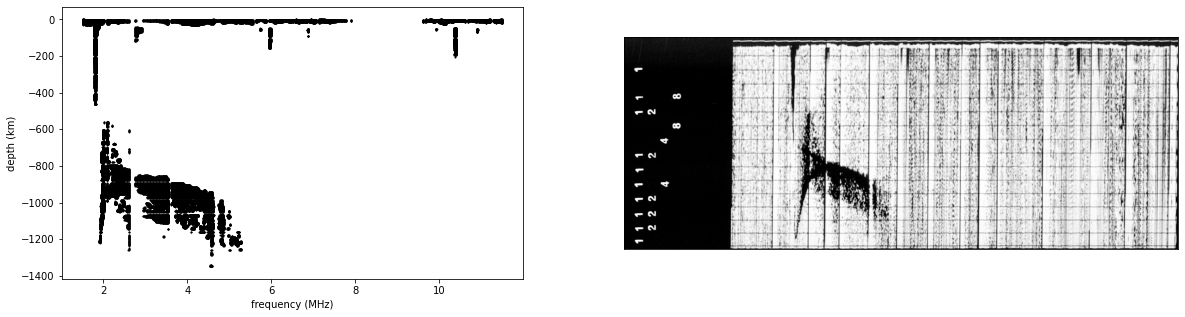

L:/DATA/Alouette_I/BATCH_I_Run2/04_processed/R014207967/1391-1B/127.png


(7728, 2)


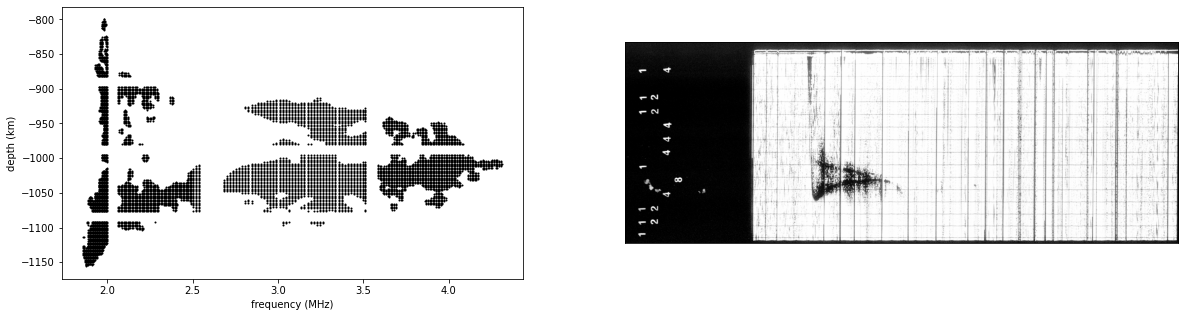

L:/DATA/Alouette_I/BATCH_I_Run2/04_processed/R014207967/1423-5A/241.png


(29202, 2)


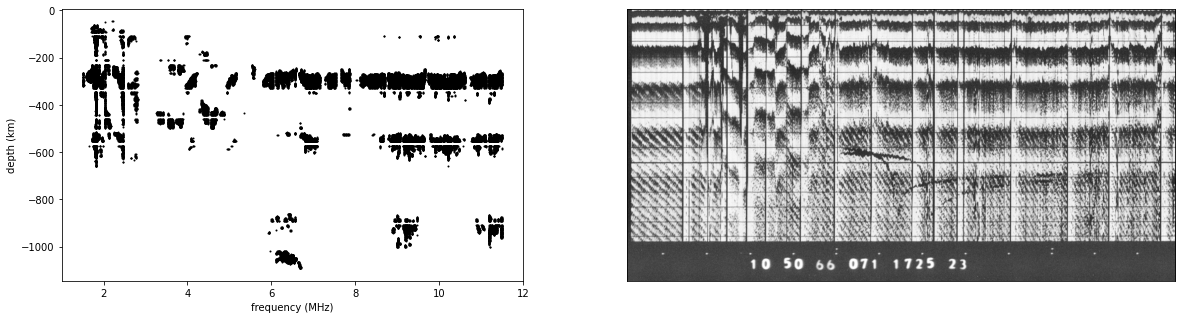

L:/DATA/Alouette_I/BATCH_I_Run2/04_processed/R014207816/3427-50A/12.png


(60379, 2)


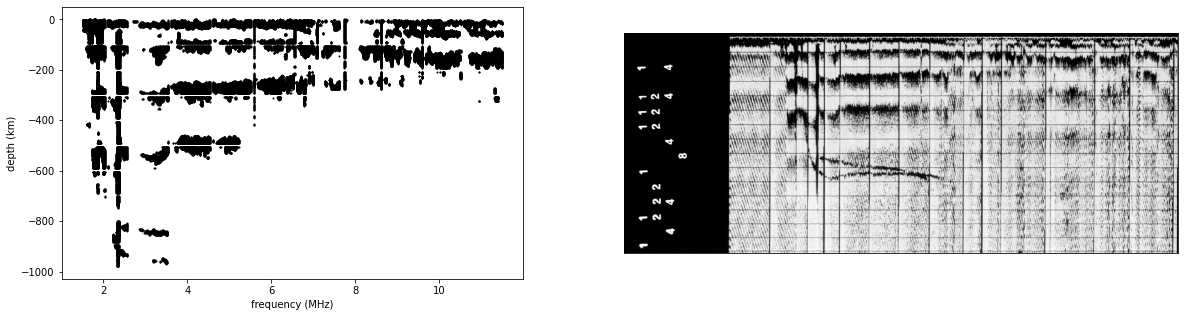

L:/DATA/Alouette_I/BATCH_I_Run2/04_processed/R014207949/2135-5B/201.png


(10736, 2)


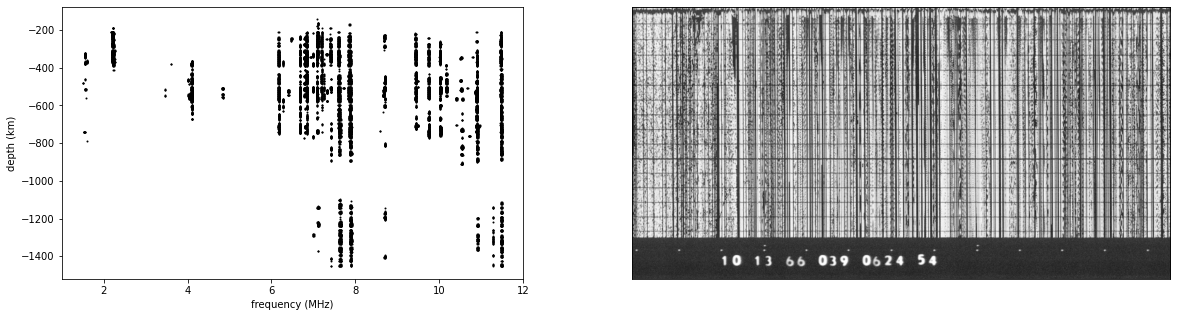

L:/DATA/Alouette_I/BATCH_I_Run2/04_processed/R014207816/3394-A13/90.png


(41737, 2)


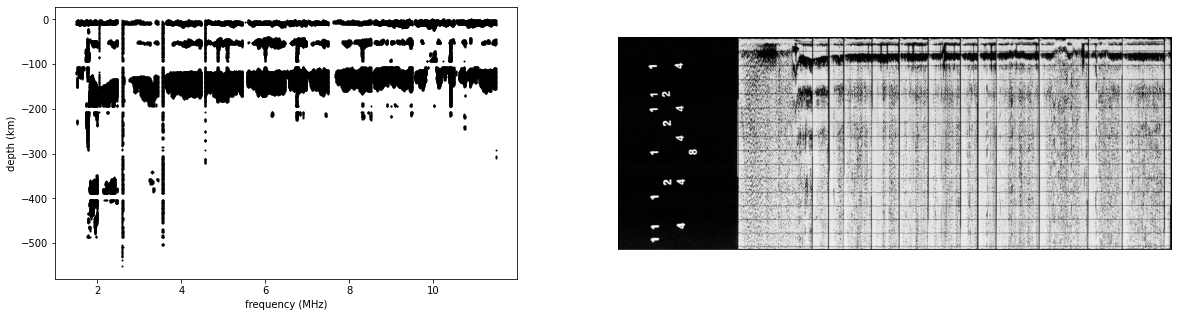

L:/DATA/Alouette_I/BATCH_I_Run2/04_processed/R014207949/2151-5B/235.png


(55853, 2)


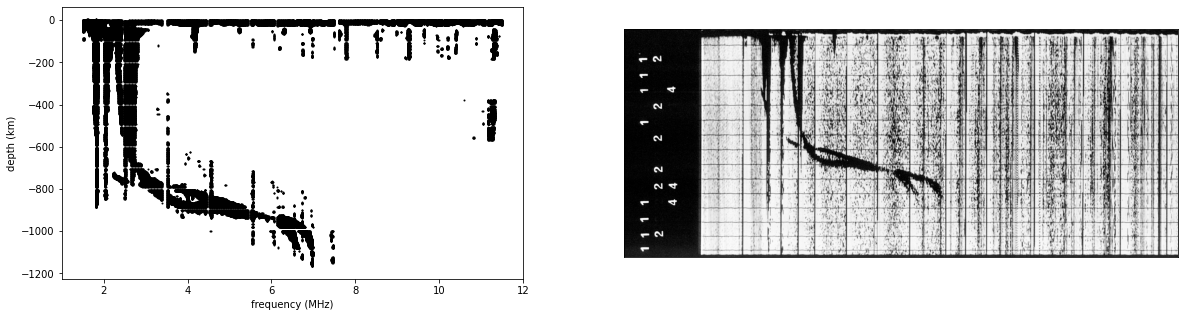

L:/DATA/Alouette_I/BATCH_I_Run2/04_processed/R014207968/1253-13B/210.png




In [44]:
for i in range(0, 10):
    
    draw_dict = draw_random_image(processedDir=processedDir)
    arr_name = draw_dict['filename'].replace('.png', '.npy')
    
    try:
        arr_load = np.load(mapped_coordsDir + draw_dict['Directory'] + '/' + draw_dict['Subdirectory'] + '/' + 'mapped_coords-' + draw_dict['Directory'] + '_' + draw_dict['Subdirectory'] + '_' + arr_name)
        print(arr_load.shape)
    except:
        continue
    
    df_plot = pd.DataFrame({
        'f': arr_load[:, 0],
        'depth': arr_load[:, 1]
    })
    df_plot['depth_plot'] = -1*df_plot['depth']
    
    f, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1,1.2],}, figsize=(20,5))
    axs[0].scatter(df_plot['f'], df_plot['depth_plot'], 1, color='black')
    axs[0].set(xlabel='frequency (MHz)', ylabel='depth (km)')
    img = mpimg.imread(draw_dict['filepath'])
    axs[1].imshow(img)
    axs[1].set(xticks=[], yticks=[])
    
    plt.show()
    print(draw_dict['filepath'])
    print('')
    print('')